In [37]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import  mean_absolute_error

In [3]:
# Load the CSV file
data = pd.read_csv('property_data.csv')
data.head(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,property_loss
0,0.250043,0.054669,0.836643,0.930073,0.847678,2.097365
1,0.986387,0.993249,0.546505,0.815085,0.388016,2.331843
2,0.016660,0.479669,0.680436,0.094524,0.155234,0.525225
3,0.810624,0.310022,0.051825,0.613175,0.422602,1.774555
4,0.933530,0.608644,0.226639,0.993233,0.637451,2.701399
5,0.689063,0.487465,0.695431,0.921731,0.463465,2.275857
6,0.522322,0.835878,0.213151,0.720252,0.933118,2.304525
7,0.672139,0.086190,0.086869,0.319866,0.884839,1.925622
8,0.936160,0.012540,0.616733,0.675366,0.455355,1.801777
9,0.244918,0.772419,0.044055,0.353830,0.317978,1.158676


In [39]:
data = pd.read_csv('demo_data.csv')
data.head(20)

,STATE,latitude,longitude,Number of Inhabited villages,Number of Uninhabited villages,Number of towns,Number of households,Total Population,Males Population,Females Population,Area (In sq. km),Population per sq. km.,WIND SPEED,YEAR,STORM NAME,monetory loss,CASUALITIES
0,0,0.577503,0.772875,0.725090,0.162521,0.502804,0.271993,0.816876,0.724866,0.543817,0.110261,0.721825,148,2013,0.583675,0.240464,0.894013
1,1,0.751719,0.715681,0.674887,0.935093,0.935455,0.117289,0.124583,0.300900,0.968595,0.525242,0.363450,251,2014,0.133585,0.920861,0.366860
2,2,0.275286,0.279987,0.938765,0.866279,0.893617,0.885852,0.666617,0.721098,0.181259,0.165079,0.200428,134,1998,0.736939,0.086526,0.933454
3,3,0.618482,0.097055,0.883411,0.705959,0.455236,0.853837,0.085071,0.748028,0.912343,0.451957,0.075505,214,2020,0.865217,0.476515,0.427153
4,4,0.186465,0.137158,0.568522,0.558796,0.283248,0.011794,0.390754,0.531880,0.360385,0.312805,0.924525,149,1995,0.595087,0.696665,0.816336
5,5,0.130097,0.672040,0.014087,0.780507,0.929992,0.770434,0.572133,0.146595,0.873999,0.961054,0.560217,204,2001,0.751474,0.768152,0.494882
6,6,0.787065,0.559739,0.788033,0.141523,0.428485,0.753230,0.186376,0.418978,0.019116,0.462837,0.082997,120,2000,0.865375,0.124026,0.996887
7,7,0.362621,0.397334,0.879278,0.554956,0.895748,0.492799,0.304742,0.085648,0.283725,0.248975,0.196938,204,2011,0.444896,0.967339,0.825938
8,8,0.198268,0.728905,0.599196,0.307529,0.067598,0.508625,0.322248,0.958239,0.831834,0.515215,0.197355,171,2003,0.030004,0.300702,0.868035
9,9,0.339310,0.645259,0.039365,0.134764,0.798756,0.743837,0.340413,0.086744,0.171359,0.170174,0.463745,202,2010,0.890234,0.182686,0.599405


In [35]:
x = data.iloc[:, 3:-1].values
x

array([[5.29411765e-01, 3.54838710e-01, 6.87500000e-01, 9.70588235e-01,
        6.47058824e-01, 3.82352941e-01, 2.05882353e-01, 2.40174860e-02,
        7.18750000e-01, 2.01300000e+03, 7.57575760e-02, 1.73076923e-01,
        3.69565217e-01],
       [5.29411765e-01, 3.54838710e-01, 6.87500000e-01, 9.70588235e-01,
        6.47058824e-01, 3.82352941e-01, 2.05882353e-01, 2.40174860e-02,
        7.18750000e-01, 2.02200000e+03, 1.51515152e-01, 2.11538462e-01,
        5.65217391e-01],
       [5.29411765e-01, 3.54838710e-01, 6.87500000e-01, 9.70588235e-01,
        6.47058824e-01, 3.82352941e-01, 2.05882353e-01, 2.40174860e-02,
        7.18750000e-01, 2.01800000e+03, 2.57575758e-01, 8.26923077e-01,
        7.82608696e-01],
       [5.29411765e-01, 3.54838710e-01, 6.87500000e-01, 9.70588235e-01,
        6.47058824e-01, 3.82352941e-01, 2.05882353e-01, 2.40174860e-02,
        7.18750000e-01, 2.01000000e+03, 3.33333333e-01,            nan,
        1.73913043e-01],
       [5.29411765e-01, 3.54838710e-

In [34]:
from sklearn.impute import SimpleImputer
import numpy as np
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Imputer.fit(x[:, 3:-1])
x[:, 3:-1] = Imputer.transform(x[:, 3:-1])

In [27]:
# Separate the features (X) and target variable (y)
X = data.drop('CASUALITIES', axis=1)
y = data['CASUALITIES']

In [28]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Create the Linear Regression model
lr_model = LinearRegression()

In [30]:
# Train the model
lr_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'WEST BENGAL'

In [ ]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test)

In [38]:
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

ValueError: Found input variables with inconsistent numbers of samples: [14, 4]

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print("\nPredicted Property Loss Values:")
print(y_pred)


Mean Squared Error: 0.29549854264498693

Predicted Property Loss Values:
[ 0.79431234 -0.87630934  0.33024515  0.23859136]


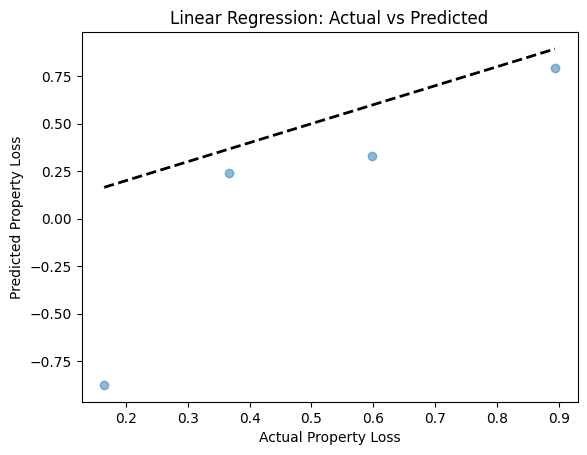

In [ ]:
# Plot the actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Property Loss')
plt.ylabel('Predicted Property Loss')
plt.title('Linear Regression: Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
plt.show()
